## Deep Learning based Flame Detection model : 
---
# *Computer vision and Deep learning (AI) based Flame Detection model*  
---

#### Tools Required

Python 3.6 is used during development and following libraries are required to run the code provided in the notebook:

Tensorflow

Keras

Matplotlib

Opencv

# Implement a Convolutional Neural Network - Binary Classification

Lets implement a basic neural network in python for binary classification which is used to classify if a given image is Flame or No_Flame.


Convolutional Neural Networks (CNNs) are the current state-of-art architecture for image classification task. Whether it is facial recognition, self driving cars or object detection, CNNs are being used everywhere. In this post, Convolutional Neural Network (CNN) model is designed using keras with tensorflow backend for the Flame Detection task. The whole work flow can be:

#### 1) Preparing the data

#### 2) Building and compiling of the model

#### 3) Training and evaluating the model

#### 4) Saving the model to disk for reuse

In [1]:
import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


## Dataset Preparation

First step is to load and prepare the dataset


The data set used here is the collection videos from Flame lab and videos archived in Phoenix SVN. 

For Dataset preparation, the videos are converted to images to train the model. The image database contains 1301 training images and 591 testing images of random size. The next step is to load the training dataset and split the data in two sets, 80% for training, 20% for Validation of developed model.

In [2]:
img_width = 224
img_height = 224
FLAME_TRAIN_DIR = 'train/'
FLAME_TEST_DIR = 'val/'

Flame_train_images = [FLAME_TRAIN_DIR+i for i in os.listdir(FLAME_TRAIN_DIR)] # use this for full dataset
Flame_test_images = [FLAME_TEST_DIR+i for i in os.listdir(FLAME_TEST_DIR)]


In [3]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'Flame' in i:
            y.append(1)
        else:
            y.append(0)        
            
    return x, y

In [4]:
X, Y = prepare_data(Flame_train_images)

# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=1)

In [5]:
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 16

## Model Architecture

After the data is ready to be fed to the model, we need to define the architecture of the model and compile it with
necessary optimizer function, loss function and performance metrics.

The architecture followed here is a series of convolution layers followed by pooling layer, 
a fully connected layer and sigmoid layer respectively. Multiple filters are used at each convolution layer, 
for different types of feature extraction. 


In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

## Defining the Loss Function for Model

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Training the Model on Flame Dataset

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [10]:
train_generator = train_datagen.flow(np.array(X_train), Y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val), Y_val, batch_size=batch_size)

In [11]:
visualize_acc_loss = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/25
65/65 [==============================] - 100s 2s/step - loss: 0.5332 - acc: 0.7394 - val_loss: 0.2573 - val_acc: 0.9310
Epoch 2/25
65/65 [==============================] - 105s 2s/step - loss: 0.2176 - acc: 0.9173 - val_loss: 0.1283 - val_acc: 0.9579
Epoch 3/25
65/65 [==============================] - 104s 2s/step - loss: 0.1537 - acc: 0.9510 - val_loss: 0.1072 - val_acc: 0.9579
Epoch 4/25
65/65 [==============================] - 104s 2s/step - loss: 0.1162 - acc: 0.9615 - val_loss: 0.1136 - val_acc: 0.9617
Epoch 5/25
65/65 [==============================] - 106s 2s/step - loss: 0.1017 - acc: 0.9692 - val_loss: 0.0968 - val_acc: 0.9579
Epoch 6/25
65/65 [==============================] - 107s 2s/step - loss: 0.0712 - acc: 0.9798 - val_loss: 0.0490 - val_acc: 0.9847
Epoch 7/25
65/65 [==============================] - 110s 2s/step - loss: 0.0890 - acc: 0.9721 - val_loss: 0.0793 - val_acc: 0.9693
Epoch 8/25
65/65 [==============================] - 109s 2s/step - loss: 0.0631 - a

### Plot the Loss and Accuracy of Flame Detection Model

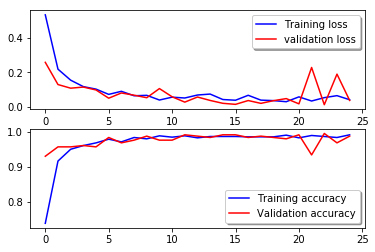

In [12]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(visualize_acc_loss.history['loss'], color='b', label="Training loss")
ax[0].plot(visualize_acc_loss.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(visualize_acc_loss.history['acc'], color='b', label="Training accuracy")
ax[1].plot(visualize_acc_loss.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Validation of the flame Detection Model on validation data

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

I am 100.00% sure this is a Not a Flame


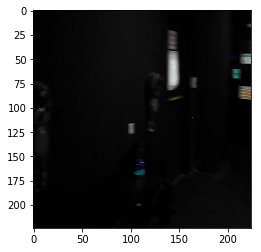

I am 100.00% sure this is a Not a Flame


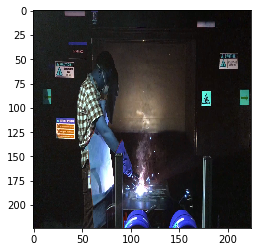

I am 100.00% sure this is a Flame


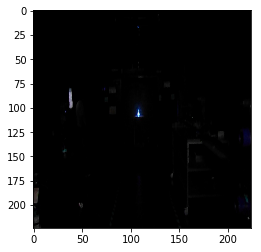

I am 100.00% sure this is a Not a Flame


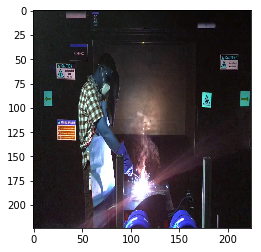

I am 100.00% sure this is a Not a Flame


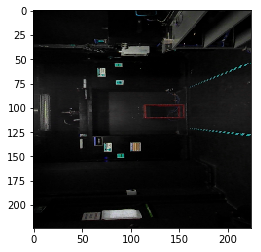

In [14]:
Y_pred = model.predict(np.array(X_val))

#####predict Flame | predict No_Flame

for i in range(0,5):
    if Y_pred[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Flame'.format(Y_pred[i][0]))
    else: 
        print('I am {:.2%} sure this is a Not a Flame'.format(1-Y_pred[i][0]))
        
    plt.imshow(X_val[i])    
    plt.show()

## Evaluating the Flame Detection Model on Test Data

### Now the trained model needs to be evaluated in terms of performance.

In [15]:
# Validating the score on test data 
X_test, Y_test = prepare_data(Flame_test_images) #Y_test in this case will be []
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_evaluator = test_datagen.flow(np.array(X_test), Y_test, batch_size=batch_size)

score = model.evaluate_generator(test_evaluator,verbose = 1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

37/37 [==============================] - 16s 429ms/step
Test score: 0.28100792210794945
Test accuracy: 0.9543147208121827


Test accuracy 95%+ implies the model is trained well for prediction(but still it need to improved). If we visualize the whole training log, then with more number of epochs the loss and accuracy of the model on training and testing data converged thus making the model a stable one.

## How Good is the trained model in detection of Flame presence?? 

A confusion matrix is a good technique for summarizing the performance of a classification algorithm. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

## lets evaluate the model with respective to confusion matrix

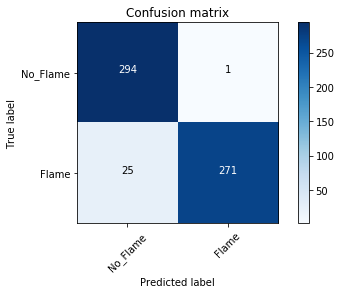

In [16]:
# Predict the values from the Test dataset
Y_pred = model.predict(np.array(X_test))

Y_pred_test_labels = [] # labels    
    
for i in range(0,len(Y_pred)):
    if Y_pred[i, 0] >= 0.5: 
        Y_pred_test_labels.append(1)
    else:
        Y_pred_test_labels.append(0)


# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test, Y_pred_test_labels) 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = ['No_Flame','Flame'] )

It gives the insights not only into the errors being made by the machine learning model but more importantly the types of errors that are being made.

Calculating a confusion matrix can give you a better idea of what our Flame Detection model is getting right and what types of errors it is making.


#### 1) True Positives (TP): A true positive is an outcome where the model correctly predicts the positive class. These are cases in which model predicted No Flame presence, and actually there is no Flame.

#### 2) True Negatives (TN): A true negative is an outcome where the model correctly predicts the negative class. These are cases in which model predicted Flame presence, and actually there is Flame present.

#### 3) False Positives (FP): A false positive is an outcome where the model incorrectly predicts the positive class. The model predicted that there is no Flame presence, but actually there is Flame present. (Also known as a “Type I error.”)

The model failed 25 times in predicting Flame presence even though there is Flame present.

#### 4) False negatives (FN): A false negative is an outcome where the model incorrectly predicts the negative class. The model predicted that there is Flame presence, but actually there is no Flame present. (Also known as a “Type II error.”)

The model failed 1 time by predicting Flame presence even though there is no Flame. It is False alarm.



## Saving the model to disk for reuse

The saved model can be reused later or easily ported to other environments too.

In [18]:
# Save the Model
model.save_weights("flame_Detectionmodel_weight.h5")
model.save('flame_Detectionmodel_weight.h5')  # creates a HDF5 file 'flame_Detectionmodel_weight.h5'

## Load the Flame Detection Model to test in Real-time scenario (or) with Flame videos

In [20]:

from keras.models import load_model
Flame_Detection_model= load_model('flame_Detectionmodel_weight.h5')

In [33]:
from numpy import zeros, newaxis
# Create a VideoCapture object and read from input file
# If the input is video, pass the video file name
cap = cv2.VideoCapture('Model_Inputs/Flame_Validate.avi')

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = 224
frame_height = 224

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('Model_outputs/LedFlashlight.MOV',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")


#Read and display video frames until video is completed or 
#user quits by pressing ESC
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    #Resize the video frame
    image = cv2.resize(frame, (224, 224),interpolation=cv2.INTER_CUBIC)
    img_4d = image[newaxis,:,:,:]
    pred = Flame_Detection_model.predict(img_4d)
    
    # Display the resulting frame
    cv2.putText(image, "Model Detects ", (20, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
    if pred[0, 0] >= 0.5 :
        cv2.putText(image, "As: " + str("FLAME   "), (20, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    else:
        cv2.putText(image, "As: " + str("No_FLAME"), (20, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    #cv2.imshow('Frame',image)  
    # Write the frame into the file 'output.avi'
    out.write(image)
    # Press esc on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == 27:
      break

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()
out.release()

# Closes all the frames
cv2.destroyAllWindows()
